# INTRODUCTORY STATISTICS WITH NUMPY (and a little scipy)
## Moses Boudourides

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.integrate import quad
import seaborn as sns
sns.set(color_codes = True)
import warnings
warnings.filterwarnings('ignore')

### 1. Bernoulli trials (coin tosses)

In [2]:
def head_counts_in_coin_toss_experiment(times_to_repeat,tosses_each_time):
    head_count = np.empty([times_to_repeat,1], dtype=int)  
    for times in np.arange(times_to_repeat):
        experiment = np.random.randint(0,2,tosses_each_time)
        head_count[times] = experiment[experiment==1].shape[0] 
    return [x[0] for x in head_count] 

In [3]:
times_to_repeat=100000
tosses_each_time=1000
head_count=head_counts_in_coin_toss_experiment(times_to_repeat,tosses_each_time)
head_count[:10]

[495, 459, 510, 498, 495, 523, 489, 505, 511, 515]

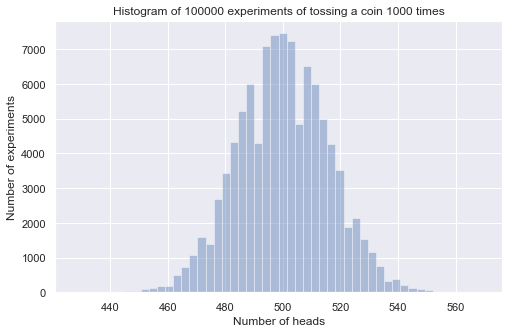

In [4]:
plt.figure(figsize=(8,5));
sns.distplot(head_count, kde=False, axlabel="Number of heads");
plt.ylabel('Number of experiments')
sst="Histogram of %i experiments of tossing a coin %i times" %(times_to_repeat,tosses_each_time)
plt.title(sst);

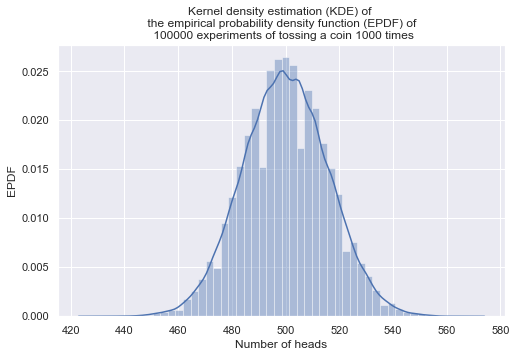

In [5]:
plt.figure(figsize=(8,5));
sns.distplot(head_count, kde=True, axlabel="Number of heads");
plt.ylabel('EPDF')
sst="Kernel density estimation (KDE) of \n the empirical probability density function (EPDF) of \n %i experiments of tossing a coin %i times" %(times_to_repeat,tosses_each_time)
plt.title(sst);

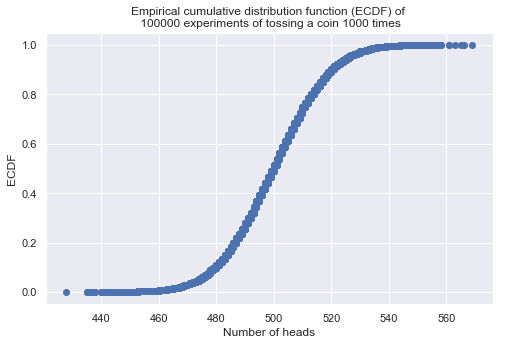

In [6]:
x = np.sort(head_count)
y = np.arange(1, x.shape[0] + 1) / x.shape[0]
plt.figure(figsize=(8,5));
plt.plot(x, y, marker='o', linestyle='');
plt.ylabel('ECDF');
plt.xlabel('Number of heads');
sst="Empirical cumulative distribution function (ECDF) of \n %i experiments of tossing a coin %i times" %(times_to_repeat,tosses_each_time)
plt.title(sst);

### 2. Normal (Gaussian) Distribution

In [7]:
def univariate_gaussian_pdf(x, mean, variance):
    return (1. / np.sqrt(2*np.pi*variance) * 
            np.exp(- ((x - mean)**2 / 2.*variance)))

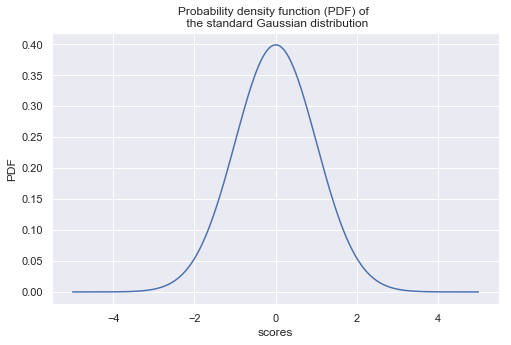

In [8]:
mean = 0
stddev = 1
x = np.arange(-5, 5, 0.01)
y = univariate_gaussian_pdf(x, mean, stddev**2)

plt.figure(figsize=(8,5));
plt.plot(x, y);
plt.xlabel('scores');
plt.ylabel('PDF');
sst="Probability density function (PDF) of \n the standard Gaussian distribution"
plt.title(sst);

In [9]:
def empirical_pdf(sample):
    sample_mean = np.mean(sample)
    sample_variance = np.var(sample, ddof=1)
    sample_sorted = np.sort(sample)
    sample_pdf = univariate_gaussian_pdf(sample_sorted, 
                                     sample_mean, 
                                     sample_variance)
    return sample_sorted, sample_pdf

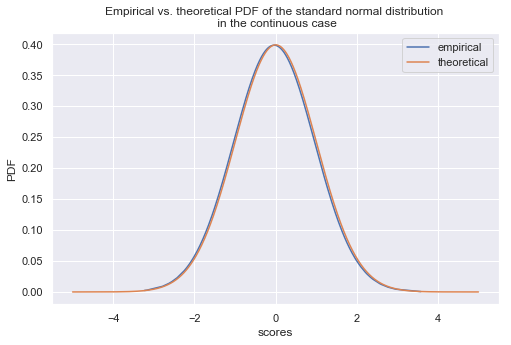

In [10]:
sample_size = 1000
rng = np.random.RandomState(123)
sample = rng.normal(loc=0.0, scale=1.0, size=sample_size)
sample_sorted, sample_pdf = empirical_pdf(sample)

plt.figure(figsize=(8,5));
plt.plot(sample_sorted, sample_pdf, label='empirical');
plt.plot(x, y, label='theoretical');
plt.ylabel('PDF');
plt.xlabel('scores');
plt.legend();
plt.title("Empirical vs. theoretical PDF of the standard normal distribution \n in the continuous case");

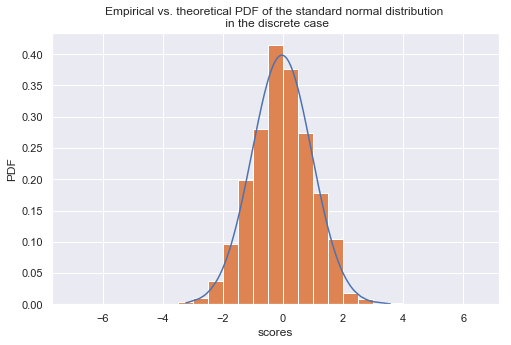

In [11]:
plt.figure(figsize=(8,5));
plt.plot(sample_sorted, sample_pdf);
plt.hist(sample_sorted, normed=True, bins=np.arange(-7, 7, 0.5));
plt.ylabel('PDF');
plt.xlabel('scores');
plt.title("Empirical vs. theoretical PDF of the standard normal distribution \n in the discrete case");

In [12]:
def gaussian_cdf_helper(t, mean, variance):
    return (1. / (np.sqrt(2.*np.pi*variance)) * 
                 np.exp(-(t - mean)**2 / (2.*variance)))

def gaussian_cdf(x, mean, variance):
    sd = 1
    mean =0
    out = []
    for val in x:
        integ = (quad(gaussian_cdf_helper, 
                      -np.inf, 
                      val, 
                      args=(mean, variance))[0])
        out.append(integ)
    return out

def empirical_cdf(sample):
    x = np.sort(sample)
    y = np.arange(1, x.shape[0] + 1) / x.shape[0]
    return x, y

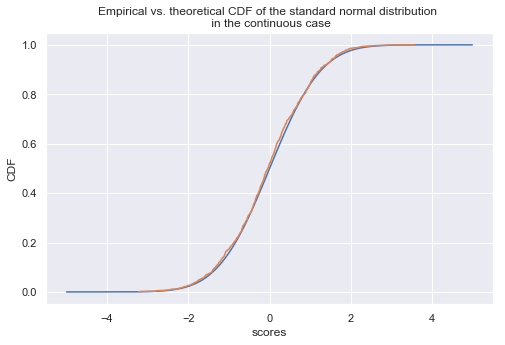

In [13]:
mean = 0
stddev = 1
x = np.arange(-5, 5, 0.01)
y = stats.norm.cdf(x)
sample_size = 1000
rng = np.random.RandomState(123)
sample = rng.normal(loc=0.0, scale=1.0, size=sample_size)
sample_sorted, sample_cdf = empirical_cdf(sample)

plt.figure(figsize=(8,5));
y = gaussian_cdf(x, mean, stddev**2);
plt.plot(x, y, label='theoretical');
plt.plot(sample_sorted, sample_cdf, label='empirical');
plt.xlabel('scores');
plt.ylabel('CDF');
plt.title("Empirical vs. theoretical CDF of the standard normal distribution \n in the continuous case");

### 3. Exponential Distribution

In [14]:
def univariate_exponential_pdf(x, lambda_):
    return np.where(x >= 0, np.exp(-lambda_*x) , 0)
def univariate_exponential_cdf(x, lambda_):
    return np.where(x >= 0, 1 - np.exp(-lambda_*x) , 0)

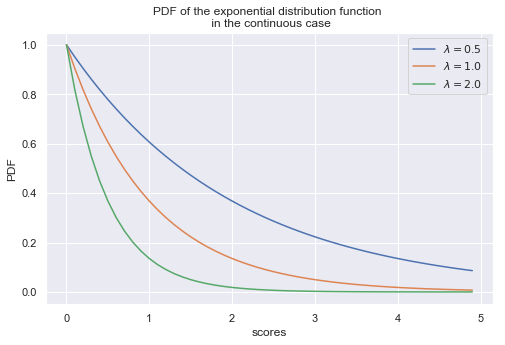

In [15]:
x = np.arange(0, 5, .1)
y_05 = univariate_exponential_pdf(x, lambda_=.5)
y_1 = univariate_exponential_pdf(x, lambda_=1.)
y_2 = univariate_exponential_pdf(x, lambda_=2.)

plt.figure(figsize=(8,5));
plt.plot(x, y_05, label='$\lambda=0.5$');
plt.plot(x, y_1, label='$\lambda=1.0$');
plt.plot(x, y_2, label='$\lambda=2.0$');
plt.xlabel('scores');
plt.ylabel('PDF');
plt.legend(loc = 'upper right');
plt.title("PDF of the exponential distribution function \n in the continuous case");

Text(0.5, 1.0, 'Empirical vs. theoretical PDF of the exponential distribution function \n in the discrete case')

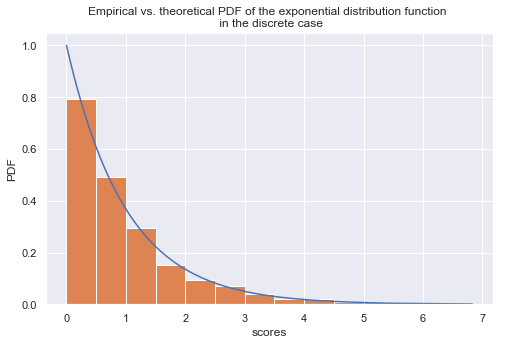

In [16]:
rng = np.random.RandomState(123)
x_sample = rng.exponential(scale=1.0, size=1000)
x_sample = np.sort(x_sample)
y_sample = stats.expon.pdf(x_sample)

plt.figure(figsize=(8,5));
plt.plot(x_sample, y_sample);
plt.hist(x_sample, normed=True, bins=np.arange(0, 7, 0.5));
plt.xlabel('scores');
plt.ylabel('PDF');
plt.title("Empirical vs. theoretical PDF of the exponential distribution function \n in the discrete case")

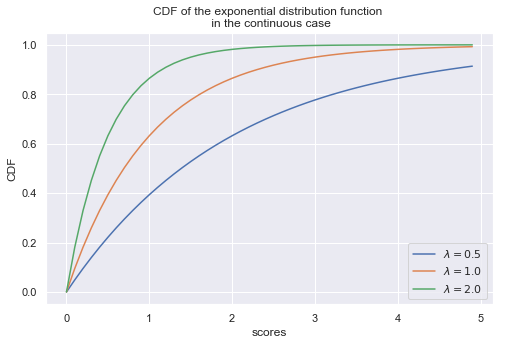

In [17]:
x = np.arange(0, 5, .1)
y_05 = univariate_exponential_cdf(x, lambda_=.5)
y_1 = univariate_exponential_cdf(x, lambda_=1.)
y_2 = univariate_exponential_cdf(x, lambda_=2.)

plt.figure(figsize=(8,5));
plt.plot(x, y_05, label='$\lambda=0.5$');
plt.plot(x, y_1, label='$\lambda=1.0$');
plt.plot(x, y_2, label='$\lambda=2.0$');
plt.xlabel('scores');
plt.ylabel('CDF');
plt.legend(loc = 'lower right');
plt.title("CDF of the exponential distribution function \n in the continuous case");

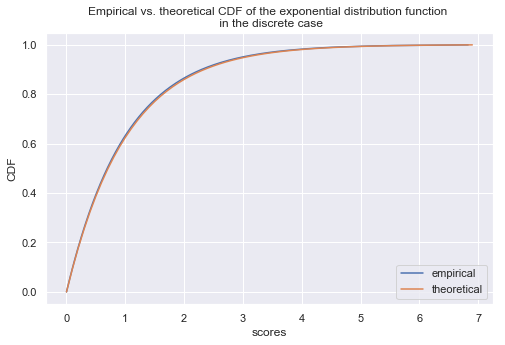

In [18]:
x = np.arange(0, 7, .1)
rng = np.random.RandomState(123)
x_sample = rng.exponential(scale=1.0, size=1000)
x_sample = np.sort(x_sample)
y_sample = stats.expon.cdf(x_sample)
y = univariate_exponential_cdf(x, lambda_=.98)

plt.figure(figsize=(8,5));
plt.plot(x_sample, y_sample,label='empirical');
plt.plot(x, y, label='theoretical');
plt.xlabel('scores');
plt.ylabel('CDF');
plt.legend(loc = 'lower right');
plt.title("Empirical vs. theoretical CDF of the exponential distribution function \n in the discrete case");

### 4. Descriptive Statistics

In [19]:
X=np.random.randint(low=1, high=100, size=2000)
X.sort()

minn=np.min(X)
maxn=np.max(X)
mean = np.mean(X)
mode = stats.mode(X)
percentile_25th = np.percentile(X, 25)
percentile_75th = np.percentile(X, 75)
percentile_multiple = np.percentile(X, q=[5, 15, 25, 50, 75, 85, 95], interpolation='lower')
median = np.median(X)
sd = np.std(X)
variance = np.var(X)
skewness = stats.skew(X)
kurtosis = stats.kurtosis(X)

print("Min", minn, "\n") 
print("Max", maxn, "\n") 
print("Mean", mean, "\n") 
print("Mode", (mode[0].tolist())[0], "\n") 
print("25th Percentile", percentile_25th, "\n")
print("75th Percentile", percentile_75th, "\n")
print("Multiple percentiles", percentile_multiple, "\n")
print("Median", median, "\n") 
print("Standard Deviation %.3f" %sd, "\n") 
print("Variance %.3f" %variance, "\n")
print("Skewness %.3f" %skewness, "\n")
print("Kurtosis %.3f" %kurtosis, "\n")

Min 1 

Max 99 

Mean 49.914 

Mode 17 

25th Percentile 25.0 

75th Percentile 75.0 

Multiple percentiles [ 6 16 25 49 75 85 94] 

Median 49.5 

Standard Deviation 28.530 

Variance 813.975 

Skewness 0.023 

Kurtosis -1.207 



In [20]:
X = np.random.rand(1000,4)

covariance = np.cov(X.T)
spearson = stats.pearsonr(X[:, 1], X[:, 2])
npearson = np.corrcoef(X[:, 1], X[:, 2])
spearman = stats.spearmanr(X[:, 1], X[:, 2])[0]
kendalltau = stats.kendalltau(X[:, 1], X[:, 2])[0]

print("Covariance", covariance.round(decimals=3), "\n")
print("Pearson correlation coefficient and p-value", round(spearson[0],3), round(spearson[1],3), "\n")
print("Pearson correlation coefficient matrix", npearson.round(decimals=3), "\n")
print("Spearman correlation coefficient", spearman.round(decimals=5), "\n")
print("Kendall-Tau correlation coefficient", kendalltau.round(decimals=3), "\n")

Covariance [[ 0.081 -0.004  0.003 -0.003]
 [-0.004  0.078  0.001  0.002]
 [ 0.003  0.001  0.085  0.001]
 [-0.003  0.002  0.001  0.086]] 

Pearson correlation coefficient and p-value 0.011 0.73 

Pearson correlation coefficient matrix [[1.    0.011]
 [0.011 1.   ]] 

Spearman correlation coefficient 0.0117 

Kendall-Tau correlation coefficient 0.008 



### 5. Least-Squares Linear Regression

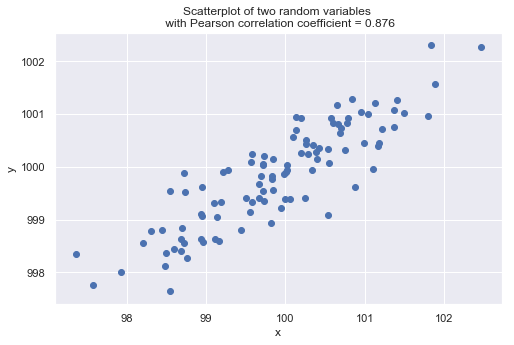

In [21]:
rng = np.random.RandomState(123)
mean = [100, 1000]
cov = [[1, 0.9], [0.9, 1]]
sample = rng.multivariate_normal(mean, cov, size=100)
x, y = sample[:, 0], sample[:, 1]

plt.figure(figsize=(8,5));
plt.scatter(x, y);
plt.xlabel('x');
plt.ylabel('y');
sst="Scatterplot of two random variables \n with Pearson correlation coefficient = %.3f" %np.corrcoef(np.vstack([x, y]))[0][1]
plt.title(sst);

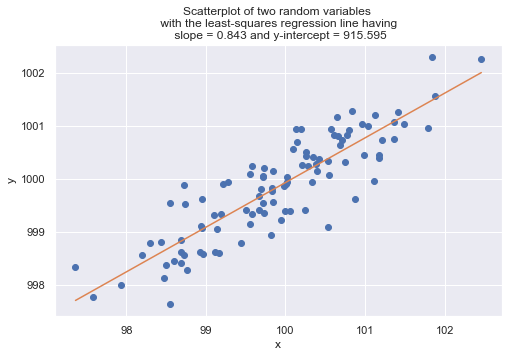

In [22]:
w = np.polyfit(x, y, deg=1)
b, w1 = w[1], w[0]
# print('slope: %.2f' % w1)
# print('y-intercept: %.2f' % b)

extremes = np.array([np.min(x), np.max(x)])
predict = extremes*w1 + b

plt.figure(figsize=(8,5));
plt.plot(x, y, marker='o', linestyle='')
plt.plot(extremes, predict)
plt.xlabel('x')
plt.ylabel('y')
sst="Scatterplot of two random variables \n with the least-squares regression line having \n slope = %.3f and y-intercept = %.3f" %(w1,b)
plt.title(sst);

In [23]:
y_predicted = x*w1 + b
mse = np.mean((y - y_predicted)**2)
rmse = np.sqrt(mse)
mean_y = np.mean(y)
SS_total = np.sum((y - mean_y)**2)
SS_residual = np.sum((y_predicted - mean_y)**2)
r_squared = SS_residual / SS_total

print("Mean squared error (MSE) = %.3f" %mse)
print("Root mean squared error (RMSE) = %.3f" %rmse)
print("Coefficient of determination (R-squared) = %.3f" %r_squared)

Mean squared error (MSE) = 0.219
Root mean squared error (RMSE) = 0.468
Coefficient of determination (R-squared) = 0.767
